In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
# Read in data
df = pd.read_csv('telco_clean.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'tenure_group_Tenure_0-12',
       'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60'],
      dtype='object')

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
1,1,0,0,0,34,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,45,0,1,0,1,1,...,0,1,1,0,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [11]:
# df=df[['tenure', 'SeniorCitizen', 'Partner','gender','PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'InternetService_DSL', 'InternetService_Fiber optic','Churn']]

In [12]:
# df=df[['gender', 'SeniorCitizen', 'Partner','tenure',
#        'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'PaperlessBilling',
#        'Churn', 'InternetService_DSL',
#        'InternetService_Fiber optic']]

In [13]:
# df=df[['tenure', 'SeniorCitizen', 'Partner','gender','Churn']]

In [14]:
# df=df[['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
#        'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
#        'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
#        'monthlycharges', 'totalcharges', 'churn', 'multiplelines_no',
#        'multiplelines_yes', 'internetservice_dsl',
#        'internetservice_fiber optic', 'contract_month-to-month',
#        'contract_one year', 'paymentmethod_bank transfer (automatic)',
#        'paymentmethod_credit card (automatic)',
#        'paymentmethod_electronic check', 'tenure_group_tenure_0-12',
#        'tenure_group_tenure_12-24', 'tenure_group_tenure_24-48',
#        'tenure_group_tenure_48-60', 'tenure_group_tenure_gt_60']]]

In [15]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [16]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'churn', 'multiplelines_no',
       'multiplelines_yes', 'internetservice_dsl',
       'internetservice_fiber optic', 'contract_month-to-month',
       'contract_one year', 'paymentmethod_bank transfer (automatic)',
       'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'tenure_group_tenure_0-12',
       'tenure_group_tenure_12-24', 'tenure_group_tenure_24-48',
       'tenure_group_tenure_48-60', 'tenure_group_tenure_gt_60'],
      dtype='object')

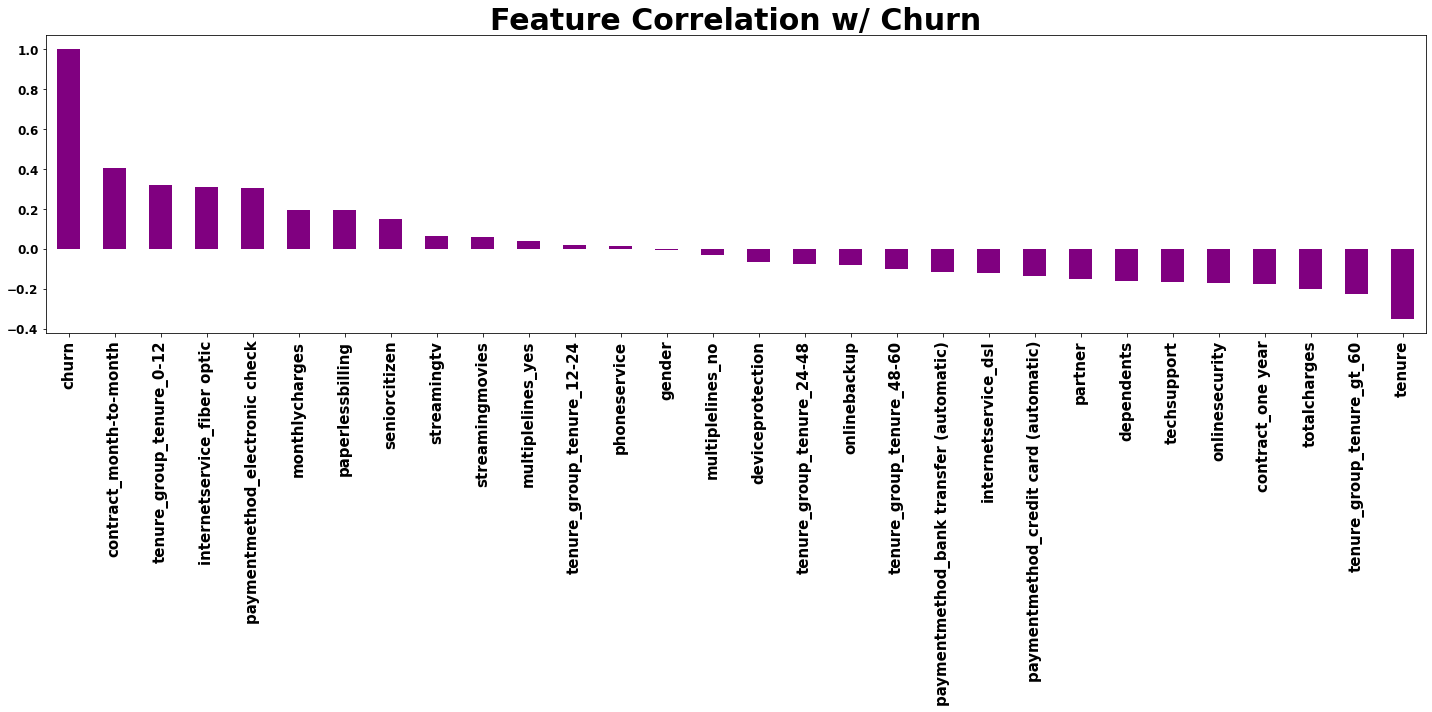

In [17]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Purple')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()


 From our heatmap and correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest *positive* correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn. 

In [18]:
# X = df.loc[:, df.columns != 'churn']
# y = df.loc[:, df.columns == 'churn']

In [19]:
# Establish our target feature, churn, as our y feature
y = df.churn.values
# Drop our target feature from our features dataframe
X = df.drop('churn', axis = 1)
cols = X.columns

In [20]:
X.shape
# y.shape

(7032, 29)

In [21]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.411986
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7004
Method:                           MLE   Df Model:                           27
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.2885
Time:                        13:27:12   Log-Likelihood:                -2897.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender                                     -0.0207

In [22]:
# std = StandardScaler()
# scaled = std.fit_transform(df[num_cols])
# scaled = pd.DataFrame(scaled,columns=num_cols)

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [23]:
# from sklearn.decomposition import PCA
  
# pca = PCA(n_components = 0.85)
# # keep 85% of the variance in the original data
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
  
# explained_variance = pca.explained_variance_ratio_

# pca.n_components_ # to check how many components that avriance produced

#While you can use PCA on binary data (e.g. one-hot encoded data) that does not mean it is a good thing, 
# or it will work very well. PCA is designed for continuous variables. It tries to minimize variance (=squared deviations).
# The concept of squared deviations breaks down when you have binary variables.

In [24]:
# pca.n_components_

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# logreg = LogisticRegression()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_test = scaler.transform(X_test) # simply TRANSFORM/APPLY to the test data (no leakage!)


## Regression

In [64]:
# Importing all the regression functions that I would require to use it for my logisitic regression.
from sklearn.linear_model import LogisticRegression

# LASSO Regression Functions
from sklearn.linear_model import Lasso, LassoCV # We can do both Lasso Classification & Ridge Classification

# RIDGE Regression Functions
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV

# Random Forest Classifier Functions
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [65]:
LR = LogisticRegression() # use logistic for a classification problem
LR = LR.fit(X_train, y_train) # fitting the model
print(LR.score(X_train,y_train)) # Return the score (for Logistic regression, it is the mean accuracy)
print(LR.score(X_test,y_test)) # Return the score (for Logistic regression, it is the mean accuracy)

0.8063795205201137
0.8037914691943128


### Lasso Regressions

In [66]:
# Doing the Lasso Regression.
lassolr = LogisticRegression(penalty='l1', solver='liblinear') 
lassolr.fit(X_train,y_train)  # fitting the Lasso model
print(lassolr.score(X_train,y_train)) # Return the training model score for the Lasso regression 
print(lassolr.score(X_test,y_test)) # Return the testing modelk score for the Lasso regression 

0.806989028850061
0.8056872037914692


### Ridge Regressions

In [67]:
# Using cross-validation for finding the best Alpha.
ridgeclasscv = RidgeClassifierCV(alphas=[0.0001,0.01, 0.1, 0.5, 1, 5, 7, 10, 100, 200]) # Using different alpha values and crossfitting the model.
ridgeclasscv.fit(X_train, y_train) # Fitting the Ridge Model
optimal = ridgeclasscv.alpha_ # Finding the optimal alpha value
print("In the above alpha values," ,optimal, "is the optimal") 
# we can conclude that in those 10 alpha values, 0.01 is the optimal value
clf = RidgeClassifier(alpha=1).fit(X_train, y_train) # Return the training model score for the Lasso regression 
print(clf.score(X_train,y_train)) # Return the training model score for the Lasso regression 
print(clf.score(X_test,y_test)) # Return the testing modelk score for the Lasso regression 

In the above alpha values, 1.0 is the optimal
0.8017066233238521
0.8033175355450237


### Random Forest Classifier

In [68]:
RandomForest = RandomForestClassifier() # Calling the random forest classifier.
RandomForest = RandomForest.fit(X_train, y_train) # Fitting the random forest model.
print(RandomForest.score(X_train, y_train)) # Return the training model score for the Raandom Forest
print(RandomForest.score(X_test, y_test)) # Return the test model score for the Raandom Forest

0.997765136123527
0.7943127962085308


## EVALUATION (BEST - LOGISTIC)

In [ ]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

# logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

logreg.fit(X_train, y_train)

In [26]:
# import pickle
# filename = 'model.sav'
# pickle.dump(logreg, open(filename, 'wb'))

In [75]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
y_pred = logreg.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

[[1403  146]
 [ 268  293]]


In [78]:
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print("TP:", tp)
# print("TN:", tn)
# print("FP:", fp)
# print("FN:", fn)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [42]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

K Folds splits the dataset into k subsets, and trains the model k-times on different training sets, and tests the model k-times on different test sets. Each time, the training set is built composing k-1 subsets, while the test set is the remaining subset.

In [44]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
y_hat_train = logreg.predict(X_train)
y_hat_test = y_pred #testing

print('Training Metrics:')
print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
print('\n')
print(f'Testing Metrics:')
print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))

acc=round(accuracy_score(y_test, y_hat_test),2)

Training Metrics:
Training Precision:  0.67
Training Recall:  0.54
Training Accuracy:  0.81
Training F1-Score:  0.6


Testing Metrics:
Testing Precision:  0.67
Testing Recall:  0.52
Testing Accuracy:  0.8
Testing F1-Score:  0.59


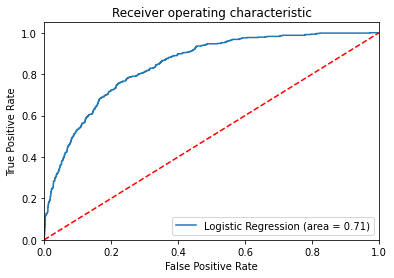

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

    coefficients                                 features
4      -4.745741                                   tenure
25     -1.767857                tenure_group_tenure_12-24
24     -1.579226                 tenure_group_tenure_0-12
26     -1.247879                tenure_group_tenure_24-48
5      -0.612349                             phoneservice
27     -0.583742                tenure_group_tenure_48-60
6      -0.502412                           onlinesecurity
9      -0.483098                              techsupport
15     -0.397295                         multiplelines_no
28     -0.320359                tenure_group_tenure_gt_60
7      -0.289078                             onlinebackup
16     -0.215055                        multiplelines_yes
8      -0.192574                         deviceprotection
3      -0.147632                               dependents
0      -0.115685                                   gender
2      -0.022250                                  partner
21      0.0342

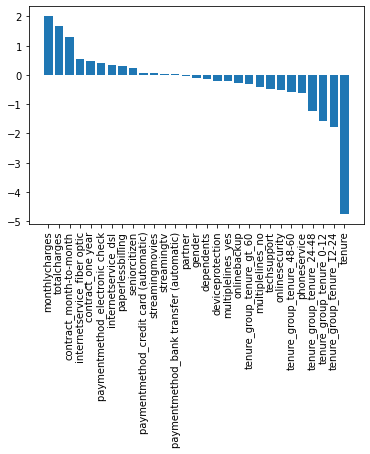

<Figure size 3600x3600 with 0 Axes>

In [46]:
from matplotlib import pyplot
# get importance
importance = logreg.coef_[0]
importance=np.sort(importance)
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

coefficients=pd.DataFrame(logreg.coef_.ravel())
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry.sort_values(by=['coefficients']))


# plot feature importance
pyplot.bar(coef_sumry['features'], coef_sumry['coefficients'])
plt.xticks(rotation = 90)
plt.xticks()
plt.figure(figsize=(50,50)) 
pyplot.show()

In [47]:
# import pickle
# with open('logreg.pkl', 'wb') ashandle:
#     pickle.dump(logreg, handle, pickle.HIGHEST_PROTOCOL)

In [48]:
# pickle_out = open("model.pkl", "wb")
# pickle.dump(logreg,pickle_out)
# pickle_out.close()

## Check Overfitting

In [67]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
kf = KFold(n_splits=10)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

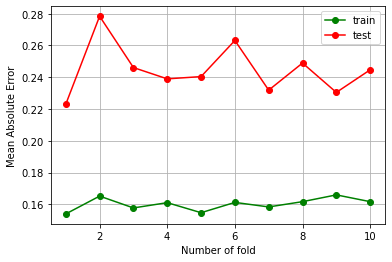

In [68]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [69]:
print("Test Accuracy (Early)", acc)

Test Accuracy (Early) 0.79


## PYCARET

In [31]:
# pip install jinja2==3.0.1

In [30]:
# import jinja2

In [29]:
# !pip install pycaret

In [49]:
from pycaret.datasets import get_data
import pandas as pd
df = pd.read_csv('telco_clean.csv')

In [52]:
from pycaret.classification import *
exp= setup(df, target = 'Churn', profile=True,fold_shuffle=True, session_id=2, imputation_type='iterative')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [54]:
df.shape

(7032, 30)

In [26]:
# df=df[['gender', 'SeniorCitizen', 'Partner','tenure',
#        'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'PaperlessBilling',
#        'Churn', 'InternetService_DSL',
#        'InternetService_Fiber optic']]

In [53]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8074,0.8437,0.5442,0.6659,0.5982,0.4734,0.4780,0.0090
lr,Logistic Regression,0.8060,0.8466,0.5381,0.6645,0.5942,0.4686,0.4734,0.2490
ridge,Ridge Classifier,0.8033,0.0000,0.4881,0.6782,0.5670,0.4442,0.4546,0.0070
ada,Ada Boost Classifier,0.8027,0.8459,0.5311,0.6574,0.5861,0.4588,0.4642,0.0770
gbc,Gradient Boosting Classifier,0.8025,0.8468,0.5134,0.6624,0.5781,0.4520,0.4584,0.2020
catboost,CatBoost Classifier,0.8019,0.8417,0.5088,0.6640,0.5751,0.4491,0.4564,1.6360
lightgbm,Light Gradient Boosting Machine,0.7954,0.8328,0.5204,0.6396,0.5725,0.4402,0.4450,0.1620
rf,Random Forest Classifier,0.7901,0.8197,0.4788,0.6381,0.5456,0.4130,0.4211,0.1710
xgboost,Extreme Gradient Boosting,0.7863,0.8208,0.5181,0.6140,0.5612,0.4214,0.4245,0.2390
et,Extra Trees Classifier,0.7696,0.7969,0.4719,0.5799,0.5195,0.3702,0.3741,0.1910


In [55]:
print(top3)

[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)]


In [56]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8142,0.8615,0.5346,0.6915,0.6030,0.4843,0.4912
1,0.7959,0.8356,0.5538,0.6288,0.5890,0.4540,0.4556
2,0.8089,0.8687,0.5328,0.6732,0.5948,0.4720,0.4776
3,0.8069,0.8234,0.5269,0.6716,0.5905,0.4666,0.4725
4,0.8089,0.8469,0.5577,0.6651,0.6067,0.4818,0.4851
Mean,0.8070,0.8472,0.5412,0.6660,0.5968,0.4717,0.4764
SD,0.0060,0.0165,0.0122,0.0206,0.0070,0.0110,0.0122


In [57]:
tuned_lr = tune_model(lr, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8032,0.8871,0.8462,0.5882,0.6940,0.5558,0.5758
1,0.7465,0.8378,0.7692,0.5128,0.6154,0.4373,0.4574
2,0.7154,0.8246,0.7364,0.4726,0.5758,0.3767,0.3976
3,0.7358,0.8431,0.8154,0.5000,0.6199,0.4347,0.4653
4,0.7927,0.8848,0.8077,0.5769,0.6731,0.5274,0.5434
5,0.7419,0.8546,0.8154,0.5072,0.6254,0.4443,0.4735
6,0.7520,0.8455,0.7538,0.5213,0.6164,0.4420,0.4585
7,0.7134,0.8014,0.7846,0.4744,0.5913,0.3906,0.4200
8,0.7358,0.8258,0.7615,0.5000,0.6037,0.4180,0.4388
9,0.7581,0.8655,0.8462,0.5263,0.6490,0.4793,0.5108


In [58]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,5.93
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


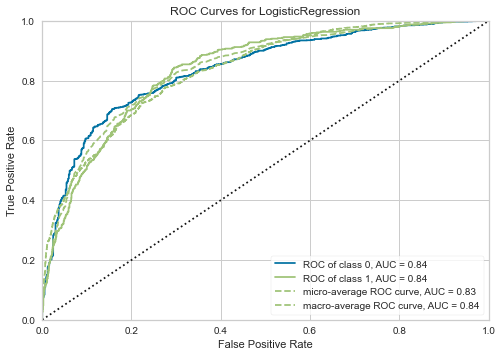

In [59]:
plot_model(tuned_lr, plot = 'auc')

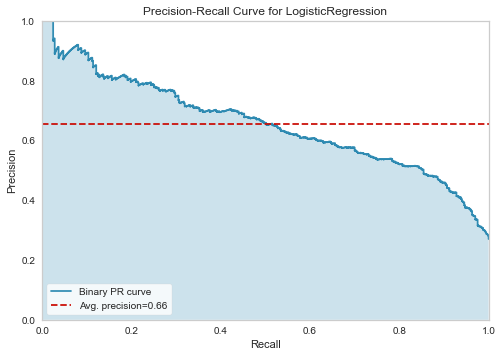

In [61]:
plot_model(tuned_lr, plot = 'pr')


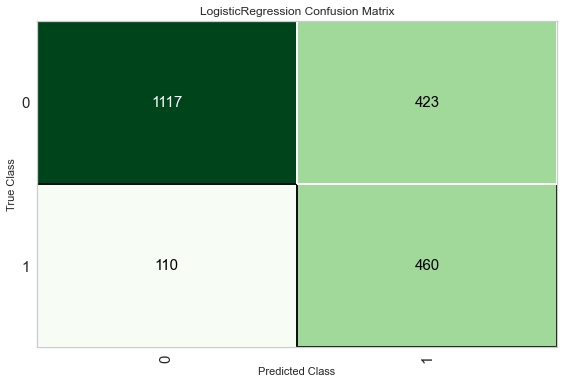

In [60]:

plot_model(tuned_lr, plot = 'confusion_matrix')

In [18]:
# save_model(tuned_lr, 'abc')
# save_model(tuned_lr,imputation_type='iterative' ,'deployment_28042020')

In [12]:
# pip install --user -U scikit-learn==0.23.2

In [13]:
# import sklearn
# print(sklearn.__version__)

In [14]:
# !pip install imblearn no deps pycaret scikit - plot pyod lightgbm plotly

In [15]:
# !pip install pycaret

In [16]:
# pip install --upgrade sklearn==0.23.2

more on Pycaret : https://towardsdatascience.com/build-and-deploy-machine-learning-web-app-using-pycaret-and-streamlit-28883a569104

Deployment test

In [89]:
fin=[49,0,0,1]
fin=np.array(fin)

In [90]:
fin=fin.reshape(1, 4)

In [91]:
type(fin)

numpy.ndarray

In [92]:
type(X_test)

numpy.ndarray

In [93]:

prediction = logreg.predict(fin)

In [94]:
int(prediction)

0

In [88]:
df.head(20)

,tenure,seniorcitizen,partner,gender,churn
0,1,0,1,0,0
1,34,0,0,1,0
2,2,0,0,1,1
3,45,0,0,1,0
4,2,0,0,0,1
5,8,0,0,0,1
6,22,0,0,1,0
7,10,0,0,0,0
8,28,0,1,0,1
9,62,0,0,1,0
